In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
countries_data = pd.read_csv('/content/Countries_of_the_world_1970 - imputed_international_data_70 (2).csv')

In [ ]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 43 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Entity                                                182 non-null    object 
 1   indiv_libs_vdem_owid                                  177 non-null    float64
 2   electdem_vdem_owid                                    177 non-null    float64
 3   libdem_vdem_owid                                      175 non-null    float64
 4   Countries                                             165 non-null    object 
 5   Economic.Freedom.Summary.Index                        182 non-null    float64
 6   Government.consumption                                182 non-null    float64
 7   Transfers.and.subsidies                               182 non-null    float64
 8   Government.investment                                 182 no

In [ ]:
#getting a dataframe that is just the dependent variable

y = countries_data['Money.growth']

Let's say we make money growth the target variable to predict.

We could try three predictors:

1) Tarriffs

2) Freedom.to.trade.Internationally

3) indiv_libs_vdem_owid

In [ ]:
X = countries_data[['Tariffs','Freedom.to.trade.Internationally','indiv_libs_vdem_owid']]

In [ ]:
X.head()

,Tariffs,Freedom.to.trade.Internationally,indiv_libs_vdem_owid
0,4.754259,4.499967,0.266
1,1.181994,0.948871,0.006
2,2.433871,2.182805,0.428
3,4.322305,3.456590,0.024
4,7.885423,7.136347,0.354


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train

,Tariffs,Freedom.to.trade.Internationally,indiv_libs_vdem_owid
100,5.600000,2.530000,0.864
113,5.600000,2.140000,0.374
125,2.751990,2.534806,0.523
36,1.010234,1.518937,0.617
101,4.800000,6.930000,0.477
...,...,...,...
106,2.400000,1.080000,0.081
14,4.954928,4.330181,0.543
92,9.870000,9.960000,0.982
179,6.155688,6.115196,NaN


In [ ]:
X_test

,Tariffs,Freedom.to.trade.Internationally,indiv_libs_vdem_owid
19,5.600000,4.270000,0.169
42,4.806494,4.531316,0.058
154,1.314190,1.764855,0.094
98,4.930000,5.440000,0.905
146,5.530000,5.390000,0.349
...,...,...,...
153,5.730000,5.710000,0.397
109,8.870000,7.790000,0.979
148,4.747408,3.835366,0.176
26,2.199375,1.737372,0.096


In [ ]:
reg = LinearRegression().fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

It seems that we have some missing values specifically for the individual liberties index. So we needed to fill them in, and there's different ideas about how to do it, we went with a relatively simple yet effective practice of filling them in with the mean seen in the code below:

In [ ]:
X_train['indiv_libs_vdem_owid'].fillna(X_train['indiv_libs_vdem_owid'].mean(),inplace=True)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 100 to 102
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Tariffs                           121 non-null    float64
 1   Freedom.to.trade.Internationally  121 non-null    float64
 2   indiv_libs_vdem_owid              121 non-null    float64
dtypes: float64(3)
memory usage: 3.8 KB


In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train,y_train)

0.09325157732312528

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 19 to 156
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Tariffs                           61 non-null     float64
 1   Freedom.to.trade.Internationally  61 non-null     float64
 2   indiv_libs_vdem_owid              61 non-null     float64
dtypes: float64(3)
memory usage: 1.9 KB


In [ ]:
predictions=reg.predict(X_test)

In [ ]:
predictions

array([8.10896821, 8.07555095, 8.01882503, 8.97470988, 8.40298659,
       8.56320848, 8.23738513, 9.0676638 , 8.54032709, 8.40545564,
       8.86795686, 8.55124421, 8.22718628, 8.25084582, 8.63854432,
       8.12711431, 8.31534659, 8.31735167, 8.42236889, 8.55891593,
       8.37921002, 8.18785906, 8.43499877, 7.90285171, 8.53321933,
       8.3265172 , 8.58488856, 8.89853493, 9.05816062, 8.11429886,
       8.16414838, 8.92635137, 8.08204044, 8.11633877, 8.17343333,
       8.49061066, 8.17574135, 8.72176504, 8.27720128, 8.4538689 ,
       8.02510366, 9.08569692, 8.39135649, 8.64846163, 8.02642706,
       8.33921837, 8.33891415, 8.60604381, 8.21243026, 8.99411769,
       9.08111218, 8.29008856, 8.31844359, 8.0279589 , 8.36717758,
       8.10969849, 8.47113502, 9.06735402, 8.11871471, 7.96725316,
       8.51000043])

In [ ]:
y_test

19     5.060000
42     8.414525
154    7.962764
98     9.370000
146    9.420000
         ...   
153    9.390000
109    9.530000
148    7.872837
26     7.027289
156    9.650000
Name: Money.growth, Length: 61, dtype: float64

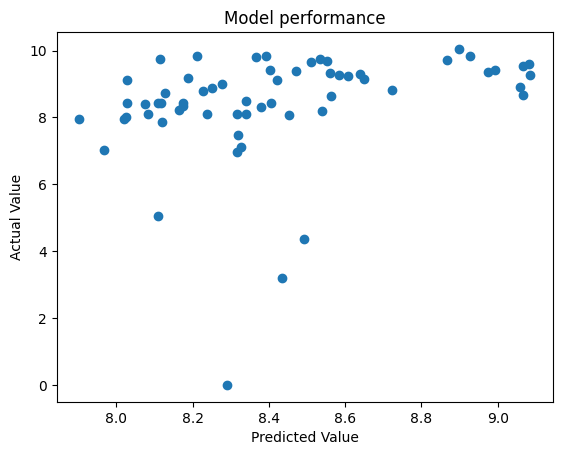

In [ ]:
plt.scatter(predictions, y_test)

# Customize the plot
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Model performance')


# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions)

2.52903156617941

In [ ]:
#for reference we'll look at MSE on the training data
predictions=reg.predict(X_train)
mean_squared_error(y_train, predictions)

1.2795321259762633

<ipython-input-22-855a284e12d3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = countries_data.corr()


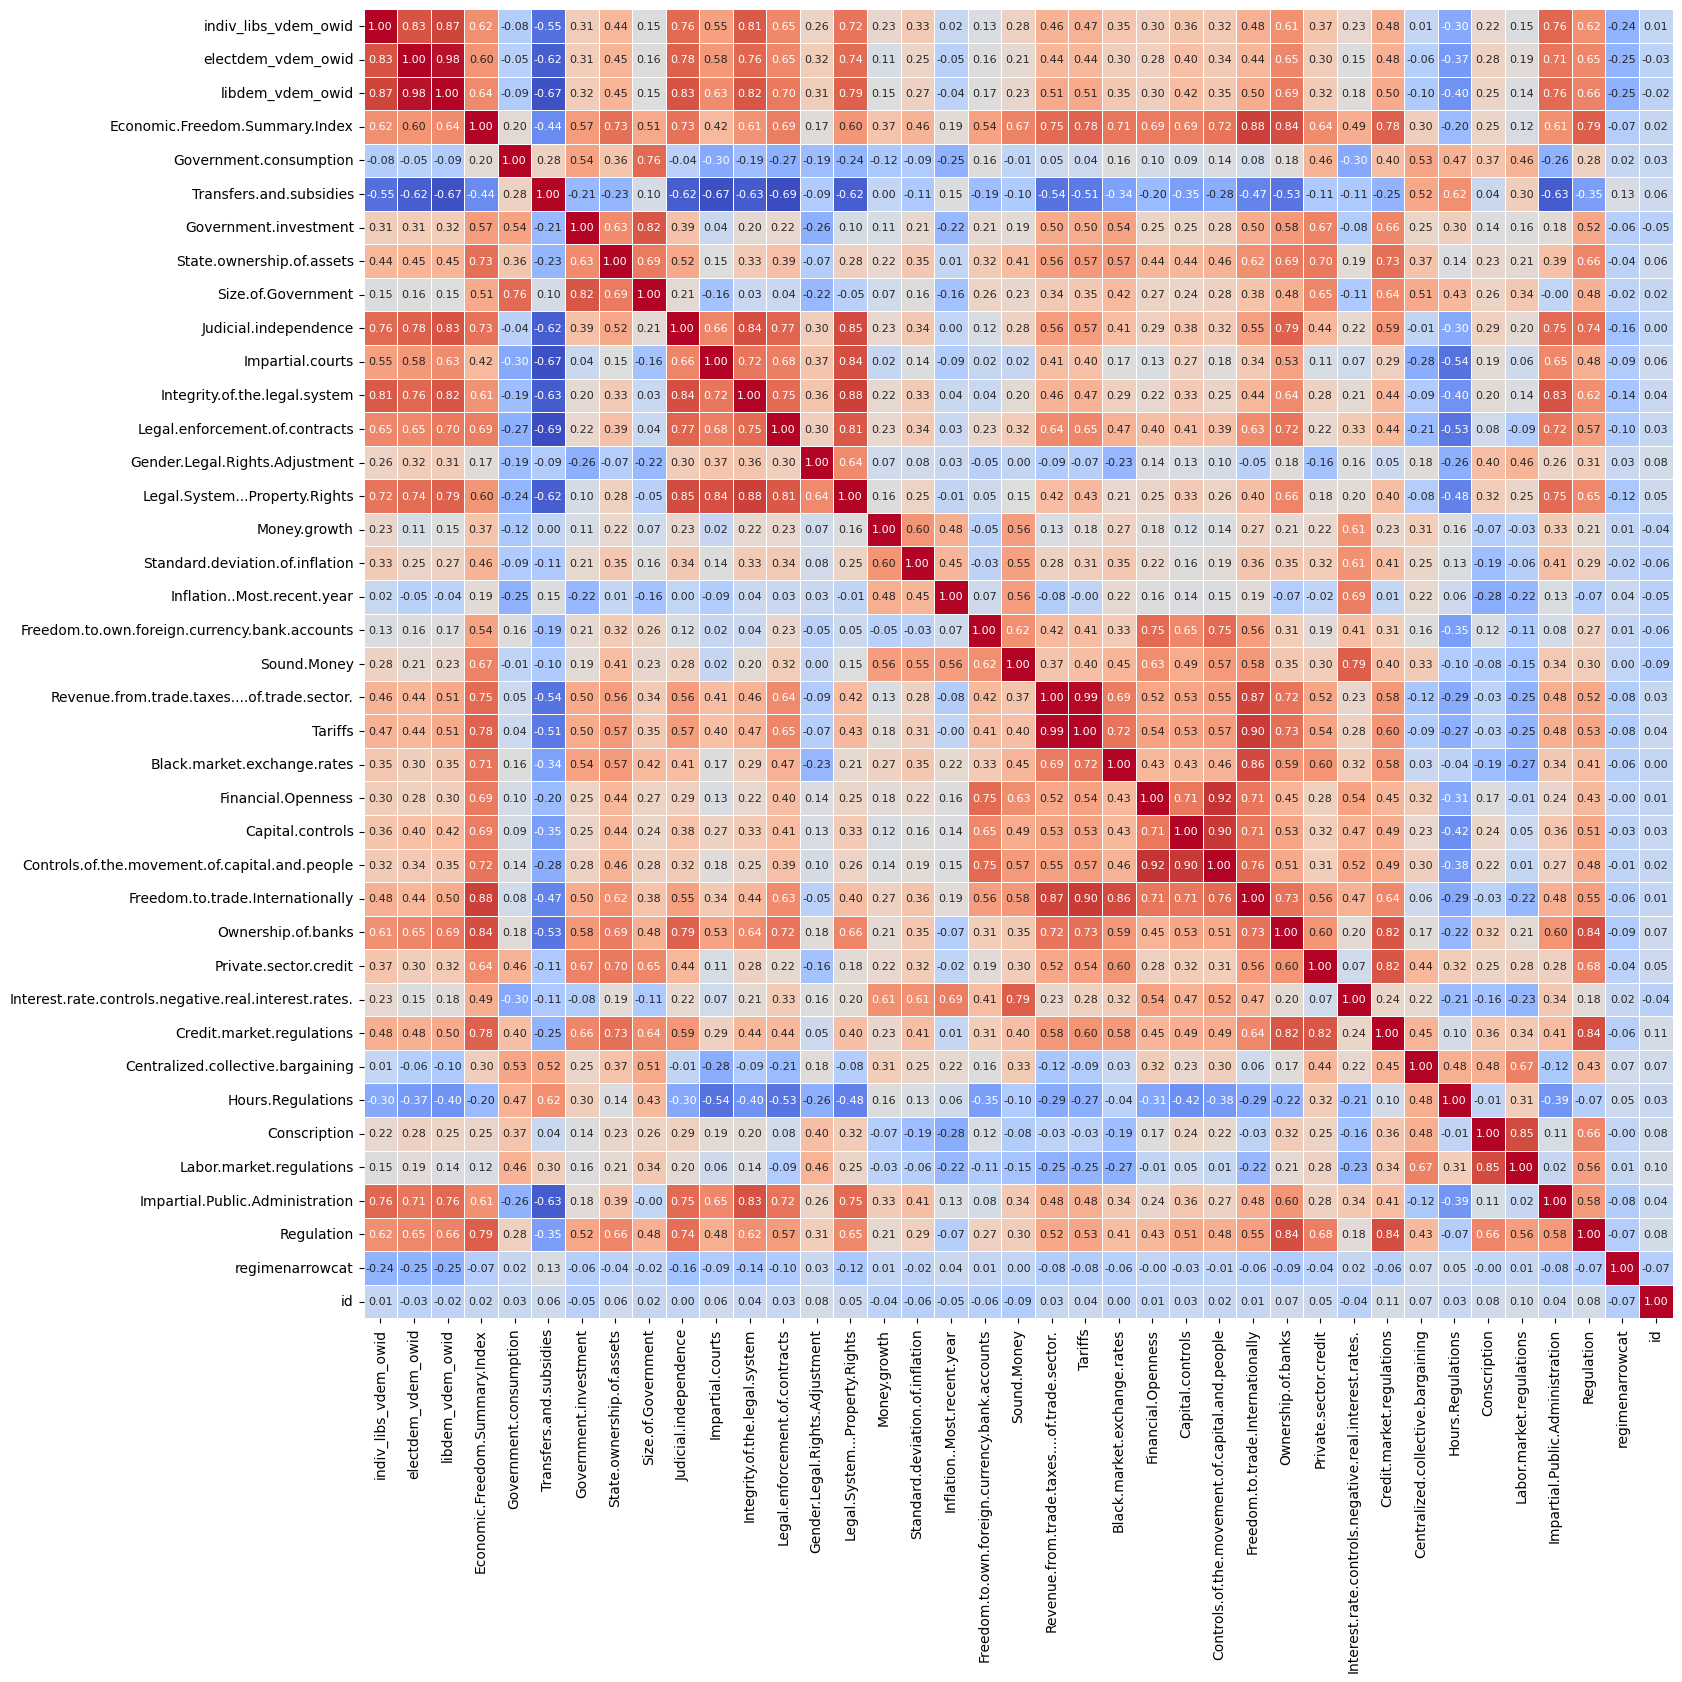

In [ ]:


# Create the correlation matrix
corr_matrix = countries_data.corr()

# Set the size of the overall figure (adjust the width and height as needed)
plt.figure(figsize=(20, 17))

# Plot the correlation matrix with adjusted cell size and text size
sn.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5, cmap="coolwarm", cbar=False, square=True, annot_kws={"size": 8})

# Show the plot
plt.show()


In [ ]:
X = countries_data[['Standard.deviation.of.inflation','Inflation..Most.recent.year','Sound.Money']]

In [ ]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 43 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Entity                                                182 non-null    object 
 1   indiv_libs_vdem_owid                                  177 non-null    float64
 2   electdem_vdem_owid                                    177 non-null    float64
 3   libdem_vdem_owid                                      175 non-null    float64
 4   Countries                                             165 non-null    object 
 5   Economic.Freedom.Summary.Index                        182 non-null    float64
 6   Government.consumption                                182 non-null    float64
 7   Transfers.and.subsidies                               182 non-null    float64
 8   Government.investment                                 182 no

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
predictions=reg.predict(X_test)

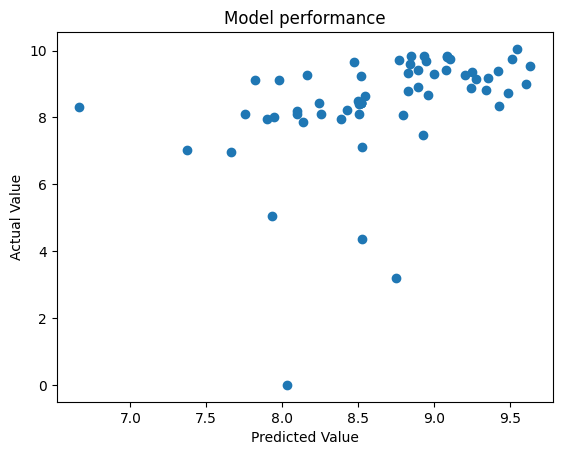

In [ ]:
plt.scatter(predictions, y_test)

# Customize the plot
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Model performance')


# Show the plot
plt.show()

In [ ]:
mean_squared_error(y_test, predictions)

2.3745345401742215

In [ ]:
predictions=reg.predict(X_train)
mean_squared_error(y_train, predictions)

0.47760344046488035

In [ ]:
reg.score(X_test,y_test)

0.13107613564406384

Binary Logistic starts here

In [3]:
countries_data["Countries"].tail(20)

162                     NaN
163                  Uganda
164                 Ukraine
165          United Kingdom
166           United States
167                 Uruguay
168                     NaN
169                     NaN
170           Venezuela, RB
171                 Vietnam
172             Yemen, Rep.
173                     NaN
174                  Zambia
175                     NaN
176                Zimbabwe
177    United Arab Emirates
178            Bahamas, The
179                  Belize
180       Brunei Darussalam
181              Montenegro
Name: Countries, dtype: object

In [4]:
from sklearn.linear_model import LogisticRegression
countries_data = countries_data[countries_data["Countries"]!="United States"]
y = np.where(countries_data['alliance'] == 'US ally',1,0)
X = countries_data[['Economic.Freedom.Summary.Index','Ownership.of.banks','indiv_libs_vdem_owid','libdem_vdem_owid']]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
X_train['indiv_libs_vdem_owid'].fillna(X_train['indiv_libs_vdem_owid'].mean(),inplace=True)
X_train['libdem_vdem_owid'].fillna(X_train['libdem_vdem_owid'].mean(),inplace=True)

In [7]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
#clf.predict(X[:2, :])

#clf.predict_proba(X[:2, :])

clf.score(X_train, y_train)

0.8264462809917356

In [8]:
clf.score(X_test,y_test)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [9]:
X_test['indiv_libs_vdem_owid'].fillna(X_train['indiv_libs_vdem_owid'].mean(),inplace=True)
X_test['libdem_vdem_owid'].fillna(X_train['libdem_vdem_owid'].mean(),inplace=True)

In [10]:
clf.score(X_test,y_test)

0.7333333333333333

In [12]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
clf.predict_proba(X_test)
probs_df = pd.DataFrame(clf.predict_proba(X_test), columns=['Probability not ally', 'Probability ally'])

In [14]:
probs_df

,Probability not ally,Probability ally
0,0.867840,0.132160
1,0.852817,0.147183
2,0.906752,0.093248
3,0.687426,0.312574
4,0.851989,0.148011
5,0.843265,0.156735
6,0.956050,0.043950
7,0.132482,0.867518
8,0.956610,0.043390
9,0.952611,0.047389


In [15]:
y_test

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
probs_df['test_data_US_ally'] = y_test.tolist()

In [17]:
probs_df

,Probability not ally,Probability ally,test_data_US_ally
0,0.867840,0.132160,1
1,0.852817,0.147183,0
2,0.906752,0.093248,1
3,0.687426,0.312574,1
4,0.851989,0.148011,0
5,0.843265,0.156735,0
6,0.956050,0.043950,0
7,0.132482,0.867518,0
8,0.956610,0.043390,0
9,0.952611,0.047389,1


In [18]:
clf.predict(X_test)
probs_df['US_ally_prediction'] = clf.predict(X_test).tolist()

In [ ]:
probs_df

In [20]:
custom_threshold = 0.3
y_pred_custom_threshold = (clf.predict_proba(X_test)[:, 1] >= custom_threshold).astype(int)
y_pred_custom_threshold

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
confusion_matrix(y_test, y_pred_custom_threshold)

array([[36,  4],
       [13,  7]])

In [23]:
confusion_matrix(y_test, clf.predict(X_test))

array([[39,  1],
       [15,  5]])

In [26]:
probs_df['test_data_US_ally'].sum()
probs_df['US_ally_prediction'].sum()


6

In [27]:
evaluation_df = pd.DataFrame(clf.predict_proba(X_train), columns=['Probability not ally', 'Probability ally'])
evaluation_df['actual ally'] = y_train.tolist()
evaluation_df.head()

,Probability not ally,Probability ally,actual ally
0,0.957108,0.042892,0
1,0.856451,0.143549,0
2,0.749573,0.250427,1
3,0.935956,0.064044,0
4,0.978500,0.021500,0


In [28]:
for i in (.15, .2, .25, .3, .35, .4, .45, .5, .55):
  evaluation_df[f'ally prediction{i}'] = np.where(evaluation_df['Probability ally']>i,1,0)
evaluation_df.head()

,Probability not ally,Probability ally,actual ally,ally prediction0.15,ally prediction0.2,ally prediction0.25,ally prediction0.3,ally prediction0.35,ally prediction0.4,ally prediction0.45,ally prediction0.5,ally prediction0.55
0,0.957108,0.042892,0,0,0,0,0,0,0,0,0,0
1,0.856451,0.143549,0,0,0,0,0,0,0,0,0,0
2,0.749573,0.250427,1,1,1,1,0,0,0,0,0,0
3,0.935956,0.064044,0,0,0,0,0,0,0,0,0,0
4,0.978500,0.021500,0,0,0,0,0,0,0,0,0,0


In [32]:
evaluation_df['actual ally'].sum()

26

In [37]:
for i in (.15, .2, .25, .3, .35, .4, .45, .5, .55):
  print((confusion_matrix(evaluation_df['actual ally'], evaluation_df[f'ally prediction{i}'])[0][0]+confusion_matrix(evaluation_df['actual ally'], evaluation_df[f'ally prediction{i}'])[1][1])/121)


0.7355371900826446
0.7851239669421488
0.8016528925619835
0.7933884297520661
0.8099173553719008
0.8099173553719008
0.8099173553719008
0.8264462809917356
0.8181818181818182
